In [1]:
%matplotlib inline
from astropy.stats import sigma_clipped_stats
from photutils import CircularAperture, aperture_photometry, CircularAnnulus, DAOStarFinder
import astropy.io.fits as pf
import numpy as np
import seaborn as sns
sns.set()
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.wcs import WCS
from matplotlib import pyplot as plt
import os
from scipy import stats

In [11]:
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\Cepheid1\V')
images = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images.append(image)
        files.append(file)
    else:
        continue
for file,image in zip(files,images):
    i = pf.open(file)
    j = i[0].header['DATE-OBS']
    k = i[0].header['OBJECT']
    print(file,j,np.shape(image),k)

ucdF_0001.fits 2020-03-13T21:37:24.252 (2056, 2048) ceph1V
ucdF_0002.fits 2020-03-13T21:38:28.408 (2056, 2048) ceph1V
ucdM_0005.fits 2020-03-09T20:54:14.215 (2056, 2048) ceph1V
ucdM_0030.fits 2020-03-09T23:00:48.663 (2056, 2048) ceph1V
ucdM_0031.fits 2020-03-09T23:02:14.115 (2056, 2048) ceph1V
ucdS_0013.fits 2020-03-14T21:24:15.696 (2056, 2048) ceph1V
ucdTh_0002.fits 2020-03-12T18:55:07.896 (2056, 2048) Ceph1V
ucdT_0036.fits 2020-03-10T19:04:47.465 (4112, 4096) ceph1V
ucdT_0251.fits 2020-03-10T23:36:20.449 (4112, 4096) ceph1V
ucdW_0033.fits 2020-03-11T19:07:27.006 (2056, 2048) ceph1V
ucdW_0034.fits 2020-03-11T19:08:41.443 (2056, 2048) ceph1V
ucdW_0258.fits 2020-03-11T23:18:44.288 (2056, 2048) ceph1V
ucdW_0259.fits 2020-03-11T23:19:20.537 (2056, 2048) ceph1V


In [3]:
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\1V Reduced')
images1 = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images1.append(image)
        files.append(file)
    else:
        continue
print(files)

['reduceducdF_0001.fits', 'reduceducdF_0002.fits', 'reduceducdM_0005.fits', 'reduceducdM_0030.fits', 'reduceducdM_0031.fits', 'reduceducdS_0013.fits', 'reduceducdTh_0002.fits', 'reduceducdW_0034.fits', 'reduceducdW_0258.fits', 'reduceducdW_0259.fits']


397.52291659607386 352.0442323590762
[348]
The best aperture for F_0001 and F_0002 is 2
397.10846937077093 352.129740894121
[271]
The best aperture for M_0005 is 4
396.2986898146338 352.3373229486345
[203]
The best aperture for M_0030 and M_0031 is 6
397.10945314550906 352.289883219273
[332]
The best aperture for S_0013 is 3
395.0792769735826 350.3494628366667
[291]
The best aperture for Th_0002 is 3
395.3809618028211 351.1732096922828
[308]
The best aperture for W_0034 is 2
395.9905072277807 353.5680353903041
[269]
The best aperture for W_0258 and W_0259 is 4


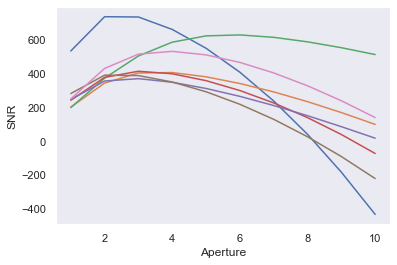

In [4]:
######################Visual 750 750#############################################
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\1V Reduced')
images1 = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images1.append(image)
        files.append(file)
    else:
        continue
images = []
images.append(images1[0]+images1[1])
images.append(images1[2])
images.append(images1[3]+images1[4])
images.extend([images1[5],images1[6],images1[7]])
images.append(images1[8]+images1[9])

#x = [0,-1,3,-19,-19,0,-247,13,-21,-21]
#y = [0,0,0,-20,-19,1,6,0,-24,-23]

x = [0,3,-19,0,-247,13,-21]
y = [0,0,-19,1,6,0,-23]
rolledimages = []
z = 0
for i in images:
    j = np.roll(i,x[z],1)
    k = np.roll(j,y[z],0)
    z+=1
    rolledimages.append(k)

xref = 398.395
yref = 351.117
nos = ['F_0001 and F_0002','M_0005','M_0030 and M_0031','S_0013','Th_0002','W_0034','W_0258 and W_0259']
for image, no in zip(rolledimages,nos):
    mean, median, std = sigma_clipped_stats(image, sigma=3)
    daofind = DAOStarFinder(fwhm=5.0, threshold=3*std) 
    sources = daofind(image - median)
    for col in sources.colnames: 
        sources[col].info.format = '%.8g'
    ID = []
    for i,j,k in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
        if -10<(i-xref)<10 and -10<(j-yref)<10:
            l = k-1
            ID.append(l)
            xref = i
            yref = j
    print(xref,yref)
    positions = [(xref,yref)]
    print(ID)
    
    radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    apertures = [CircularAperture(positions[0], r=r) for r in radii]
    phot_table = aperture_photometry(image, apertures)
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'
    annulus_aperture = CircularAnnulus(positions[0], r_in=7., r_out=10.)
    snr = np.array([])
    index = 0
    for col in phot_table.colnames[3:]:
        bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
        bkg_total = bkg_mean * apertures[index].area
        net_star = phot_table[col] - bkg_total
        snr = np.append(snr, net_star / np.sqrt(net_star + bkg_total))
        index += 1
    plt.plot(radii,snr)
    bestaperture = 0
    for k,l in zip(snr,radii):
        if k == np.max(snr):
            bestaperture = l
            print("The best aperture for",no,"is",bestaperture)
    #print('The SNR is', snr[bestaperture-1])
plt.ylabel("SNR")
plt.xlabel("Aperture")
plt.grid()
plt.savefig("apertures.png")

The best aperture for reduceducdT_0036.fits is 6
The SNR is 563.8717480026554
The best aperture for reduceducdT_0251.fits is 10
The SNR is 490.5115851236125


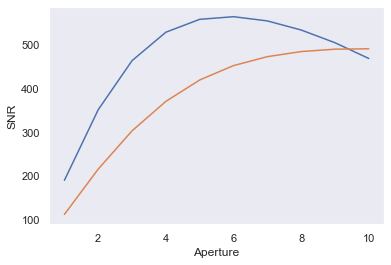

In [5]:
######################Visual 1500 1500#############################################
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\1V Reduced\1500 1500 files')
images = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images.append(image)
        files.append(file)
    else:
        continue
x = [0,-78]
y = [0,-52]
rolledimages = []
z = 0
for i in images:
    j = np.roll(i,x[z],1)
    k = np.roll(j,y[z],0)
    z+=1
    rolledimages.append(k)

xref = 761
yref = 711
for image, file in zip(rolledimages,files):
    mean, median, std = sigma_clipped_stats(image, sigma=3)
    daofind = DAOStarFinder(fwhm=4.0, threshold=3*std) 
    sources = daofind(image - median)
    for col in sources.colnames: 
        sources[col].info.format = '%.8g'
    ID = []
    
    for i,j,k in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
        if -10<(i-xref)<10 and -10<(j-yref)<10:
            l = k-1
            ID.append(l)
            xref = i
            yref = j
    #print(xref,yref)
    positions = [(xref,yref)]
    
    radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    apertures = [CircularAperture(positions[0], r=r) for r in radii]
    phot_table = aperture_photometry(image, apertures)
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'
    annulus_aperture = CircularAnnulus(positions[0], r_in=12., r_out=15.)
    snr = np.array([])
    index = 0
    for col in phot_table.colnames[3:]:
        bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
        bkg_total = bkg_mean * apertures[index].area
        net_star = phot_table[col] - bkg_total
        snr = np.append(snr, net_star / np.sqrt(net_star + bkg_total))
        index += 1
    plt.plot(radii,snr)
    bestaperture = 0
    for k,l in zip(snr,radii):
        if k == np.max(snr):
            bestaperture = l
            print("The best aperture for",file,"is",bestaperture)
    print('The SNR is', snr[bestaperture-1])
plt.ylabel("SNR")
plt.xlabel("Aperture")
plt.grid()

The best aperture for is 10


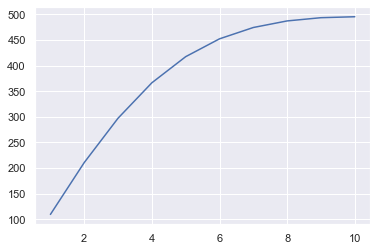

In [6]:
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\1V Reduced\1500 1500 files')
file = 'reduceducdT_0251.fits'
image = pf.getdata(file)
mean, median, std = sigma_clipped_stats(image, sigma=3)
daofind = DAOStarFinder(fwhm=4.0, threshold=3*std) 
sources = daofind(image - median)
for col in sources.colnames: 
    sources[col].info.format = '%.8g'
ID = []
xref = 837
yref = 763
for i,j,k in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
    if -10<(i-xref)<10 and -10<(j-yref)<10:
        l = k-1
        ID.append(l)
sources[ID]
positions = [(xref,yref)]
    
radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
apertures = [CircularAperture(positions[0], r=r) for r in radii]
phot_table = aperture_photometry(image, apertures)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'
annulus_aperture = CircularAnnulus(positions[0], r_in=12., r_out=15.)
snr = np.array([])
index = 0
for col in phot_table.colnames[3:]:
    bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
    bkg_total = bkg_mean * apertures[index].area
    net_star = phot_table[col] - bkg_total
    snr = np.append(snr, net_star / np.sqrt(net_star + bkg_total))
    index += 1
plt.plot(radii,snr)
bestaperture = 0
for k,l in zip(snr,radii):
    if k == np.max(snr):
        bestaperture = l
        print("The best aperture for is",bestaperture)

In [7]:
print(snr)

[109.29286468 210.63800633 297.29674863 366.50156134 417.51739439
 452.36931667 474.51108582 487.35138084 493.67017598 495.52442499]


In [8]:
x = [0,-1,3,-19,-19,0,-247,14,13,-21,-21]
y = [0,0,0,-20,-19,1,6,0,0,-24,-23]
rolledimages = []
z = 0
for i in images:
    j = np.roll(i,x[z],1)
    k = np.roll(j,y[z],0)
    print(x[z],y[z])
    z+=1
    rolledimages.append(k)

0 0
-1 0


In [9]:
n = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(n)
m = np.roll(n,1,axis=1)
print(m)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[3 1 2]
 [6 4 5]
 [9 7 8]]


In [ ]:
k = images[0]
x = np.mean(k)-5
y = np.mean(k)+20
plt.imshow(k,vmin=x,vmax=y)
plt.colorbar()
plt.show()
print(k)

In [ ]:
k = rolledimages[7]
x = np.mean(k)-5
y = np.mean(k)+20
plt.imshow(k,vmin=x,vmax=y)
plt.colorbar()
plt.show()
print(k)

In [3]:
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\Cepheid1\I')
images = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images.append(image)
        files.append(file)
    else:
        continue
for file in files:
    i = pf.open(file)
    image = pf.getdata(file)
    print(file,i[0].header['DATE-OBS'],np.shape(image))

ucdF_0005.fits 2020-03-13T21:41:33.406 (2056, 2048)
ucdF_0006.fits 2020-03-13T21:42:21.109 (2056, 2048)
ucdM_0007.fits 2020-03-09T20:57:41.385 (2056, 2048)
ucdM_0008.fits 2020-03-09T20:58:47.056 (2056, 2048)
ucdM_0009.fits 2020-03-09T20:59:52.743 (2056, 2048)
ucdM_0034.fits 2020-03-09T23:06:42.597 (2056, 2048)
ucdM_0035.fits 2020-03-09T23:07:38.674 (2056, 2048)
ucdM_0036.fits 2020-03-09T23:08:24.424 (2056, 2048)
ucdS_0016.fits 2020-03-14T21:26:47.538 (2056, 2048)
ucdTh_0008.fits 2020-03-12T19:00:45.034 (2056, 2048)
ucdT_0033.fits 2020-03-10T18:59:12.499 (4112, 4096)
ucdT_0034.fits 2020-03-10T19:00:44.076 (4112, 4096)
ucdT_0254.fits 2020-03-10T23:42:44.367 (4112, 4096)
ucdW_0038.fits 2020-03-11T19:13:03.722 (2056, 2048)
ucdW_0256.fits 2020-03-11T23:17:19.491 (2056, 2048)
ucdW_0257.fits 2020-03-11T23:17:49.882 (2056, 2048)


The best aperture for reduceducdF_0005.fits is 3
The SNR is 646.7947281447023
The best aperture for reduceducdF_0006.fits is 3
The SNR is 486.75774133134746
The best aperture for reduceducdM_0007.fits is 3
The SNR is 740.4760380441389
The best aperture for reduceducdM_0008.fits is 3
The SNR is 658.9451402976362
The best aperture for reduceducdM_0009.fits is 3
The SNR is 535.0042694451007
The best aperture for reduceducdM_0034.fits is 5
The SNR is 1219.3000829736359
The best aperture for reduceducdM_0035.fits is 4
The SNR is 1052.456318804972
The best aperture for reduceducdM_0036.fits is 5
The SNR is 775.9105032753771
The best aperture for reduceducdS_0016.fits is 3
The SNR is 422.9439336943671
The best aperture for reduceducdTh_0008.fits is 3
The SNR is 500.40280992630943
The best aperture for reduceducdW_0038.fits is 3
The SNR is 469.55496690242126
The best aperture for reduceducdW_0256.fits is 3
The SNR is 637.7836235616932
The best aperture for reduceducdW_0257.fits is 4
The SNR is

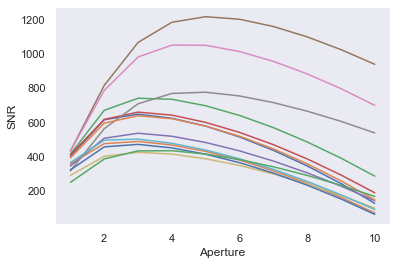

In [12]:
#############################Infrared 750 750###############################
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\1I Reduced')
images = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images.append(image)
        files.append(file)
    else:
        continue

x = [0,0,3,5,4,-17,-18,-18,1,-241,16,-20,-16]
y = [0,0,-1,-1,-2,-18,-19,-21,2,7,2,-24,-24]
rolledimages = []
z = 0
for i in images:
    j = np.roll(i,x[z],1)
    k = np.roll(j,y[z],0)
    z+=1
    rolledimages.append(k)

xref = 400
yref = 352
for image, file in zip(rolledimages,files):
    mean, median, std = sigma_clipped_stats(image, sigma=3)
    daofind = DAOStarFinder(fwhm=5.0, threshold=3*std) 
    sources = daofind(image - median)
    for col in sources.colnames: 
        sources[col].info.format = '%.8g'
    ID = []
    
    for i,j,k in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
        if -10<(i-xref)<10 and -10<(j-yref)<10:
            l = k-1
            ID.append(l)
            xref = i
            yref = j
    #print(xref,yref)
    positions = [(xref,yref)]
    
    radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    apertures = [CircularAperture(positions[0], r=r) for r in radii]
    phot_table = aperture_photometry(image, apertures)
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'
    annulus_aperture = CircularAnnulus(positions[0], r_in=12., r_out=15.)
    snr = np.array([])
    index = 0
    for col in phot_table.colnames[3:]:
        bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
        bkg_total = bkg_mean * apertures[index].area
        net_star = phot_table[col] - bkg_total
        snr = np.append(snr, net_star / np.sqrt(net_star + bkg_total))
        index += 1
    plt.plot(radii,snr)
    bestaperture = 0
    for k,l in zip(snr,radii):
        if k == np.max(snr):
            bestaperture = l
            print("The best aperture for",file,"is",bestaperture)
    print('The SNR is', snr[bestaperture-1])
plt.ylabel("SNR")
plt.xlabel("Aperture")
plt.grid()
#plt.savefig("apertures.png")

['reduceducdF_0005.fits', 'reduceducdF_0006.fits', 'reduceducdM_0007.fits', 'reduceducdM_0008.fits', 'reduceducdM_0009.fits', 'reduceducdM_0034.fits', 'reduceducdM_0035.fits', 'reduceducdM_0036.fits', 'reduceducdS_0016.fits', 'reduceducdTh_0008.fits', 'reduceducdW_0038.fits', 'reduceducdW_0256.fits', 'reduceducdW_0257.fits']
The best aperture for is 4


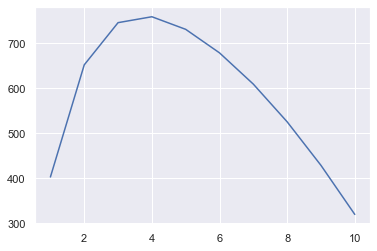

In [40]:
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\1I Reduced')
images = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images.append(image)
        files.append(file)
    else:
        continue
print(files)
xref = 419
yref = 376
image = images[11]+images[12]
mean, median, std = sigma_clipped_stats(image, sigma=3)
daofind = DAOStarFinder(fwhm=5.0, threshold=3*std) 
sources = daofind(image - median)
for col in sources.colnames: 
    sources[col].info.format = '%.8g'
ID = []
    
for i,j,k in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
    if -10<(i-xref)<10 and -10<(j-yref)<10:
        l = k-1
        ID.append(l)
sources[ID]

positions = [(xref,yref)]
    
radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
apertures = [CircularAperture(positions[0], r=r) for r in radii]
phot_table = aperture_photometry(image, apertures)
for col in phot_table.colnames:
     phot_table[col].info.format = '%.8g'
annulus_aperture = CircularAnnulus(positions[0], r_in=12., r_out=15.)
snr = np.array([])
index = 0
for col in phot_table.colnames[3:]:
    bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
    bkg_total = bkg_mean * apertures[index].area
    net_star = phot_table[col] - bkg_total
    snr = np.append(snr, net_star / np.sqrt(net_star + bkg_total))
    index += 1
plt.plot(radii,snr)
bestaperture = 0
for k,l in zip(snr,radii):
    if k == np.max(snr):
        bestaperture = l
        print("The best aperture for is",bestaperture)

The best aperture for reduceducdT_0033.fits is 8
The SNR is 612.2798480767816
The best aperture for reduceducdT_0034.fits is 6
The SNR is 720.89000146823
The best aperture for reduceducdT_0254.fits is 7
The SNR is 841.8843819698402


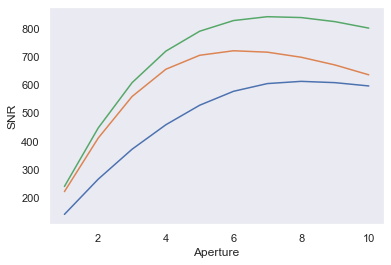

In [29]:
######################Infrared 1500 1500#############################################
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\1I Reduced\1500 1500 files')
images = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images.append(image)
        files.append(file)
    else:
        continue
x = [0,5,-78]
y = [0,1,-47]
rolledimages = []
z = 0
for i in images:
    j = np.roll(i,x[z],1)
    k = np.roll(j,y[z],0)
    z+=1
    rolledimages.append(k)

xref = 768
yref = 714
for image, file in zip(rolledimages,files):
    mean, median, std = sigma_clipped_stats(image, sigma=3)
    daofind = DAOStarFinder(fwhm=5.0, threshold=3*std) 
    sources = daofind(image - median)
    for col in sources.colnames: 
        sources[col].info.format = '%.8g'
    ID = []
    
    for i,j,k in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
        if -10<(i-xref)<10 and -10<(j-yref)<10:
            l = k-1
            ID.append(l)
            xref = i
            yref = j
    #print(xref,yref)
    positions = [(xref,yref)]
    
    radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    apertures = [CircularAperture(positions[0], r=r) for r in radii]
    phot_table = aperture_photometry(image, apertures)
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'
    annulus_aperture = CircularAnnulus(positions[0], r_in=12., r_out=15.)
    snr = np.array([])
    index = 0
    for col in phot_table.colnames[3:]:
        bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
        bkg_total = bkg_mean * apertures[index].area
        net_star = phot_table[col] - bkg_total
        snr = np.append(snr, net_star / np.sqrt(net_star + bkg_total))
        index += 1
    plt.plot(radii,snr)
    bestaperture = 0
    for k,l in zip(snr,radii):
        if k == np.max(snr):
            bestaperture = l
            print("The best aperture for",file,"is",bestaperture)
    print('The SNR is', snr[bestaperture-1])
plt.ylabel("SNR")
plt.xlabel("Aperture")
plt.grid()

In [36]:
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\1I Reduced\1500 1500 files')
images = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images.append(image)
        files.append(file)
    else:
        continue
print(files)
xref = 845
yref = 764
image = images[2]
mean, median, std = sigma_clipped_stats(image, sigma=3)
daofind = DAOStarFinder(fwhm=5.0, threshold=3*std) 
sources = daofind(image - median)
for col in sources.colnames: 
    sources[col].info.format = '%.8g'
ID = []
    
for i,j,k in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
    if -10<(i-xref)<10 and -10<(j-yref)<10:
        l = k-1
        ID.append(l)
sources[ID]

['reduceducdT_0033.fits', 'reduceducdT_0034.fits', 'reduceducdT_0254.fits']


id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64
628,844.30655,763.64455,0.43768328,-0.14113191,-0.18488486,49,0,20252.031,693.50591,-7.1026254


The best aperture for is 7


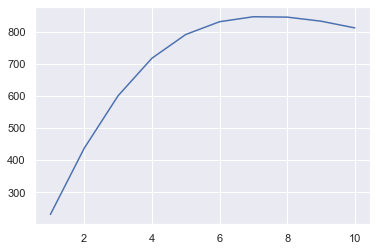

In [37]:

    
for i,j,k in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
    if -10<(i-xref)<10 and -10<(j-yref)<10:
        l = k-1
        ID.append(l)
sources[ID]

positions = [(xref,yref)]
    
radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
apertures = [CircularAperture(positions[0], r=r) for r in radii]
phot_table = aperture_photometry(image, apertures)
for col in phot_table.colnames:
     phot_table[col].info.format = '%.8g'
annulus_aperture = CircularAnnulus(positions[0], r_in=12., r_out=15.)
snr = np.array([])
index = 0
for col in phot_table.colnames[3:]:
    bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
    bkg_total = bkg_mean * apertures[index].area
    net_star = phot_table[col] - bkg_total
    snr = np.append(snr, net_star / np.sqrt(net_star + bkg_total))
    index += 1
plt.plot(radii,snr)
bestaperture = 0
for k,l in zip(snr,radii):
    if k == np.max(snr):
        bestaperture = l
        print("The best aperture for is",bestaperture)